In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_excel(r"C:\Users\win10\Downloads\bengaluru_food_delivery_reviews.xlsx")

print(df.head())

  review_id customer_name       date         restaurant_name  \
0     R1001  Aarav Sharma 2024-03-14     Fresh Craft Kitchen   
1     R1002    Priya Nair 2024-07-02  The Bombay Bar & Grill   
2     R1003  Rohit Kapoor 2024-11-21        Chaats & Chakhna   
3     R1004   Kavya Menon 2024-05-08          Sundara Spices   
4     R1005     Arjun Rao 2024-08-19    Mangalorean Delights   

                        food_item  rating  \
0  Paneer Butter Masala with Naan       5   
1            Butter Chicken Thali       4   
2                Aloo Tikki Chaat       3   
3                     Masala Dosa       5   
4            Fish Curry with Rice       4   

                                         review_text  delivery_time_min  \
0  delicious and flavorful, perfectly cooked pane...                 28   
1  rich flavors, good portion size. a bit oily bu...                 34   
2  toppings were fresh, but chutneys were a bit t...                 26   
3  crispy dosa with perfect masala. chutney 

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Load your excel file
# The 'r' before the string is a good practice for file paths in Python
df = pd.read_excel(r"C:\Users\win10\Downloads\bengaluru_food_delivery_reviews.xlsx")

# IMPORTANT: Make sure your text column is actually named 'text'.
# If it has a different name (e.g., 'Reviews'), change 'text' in the lines below.
# You can check the column names by running: print(df.columns)

# 1. Remove missing rows from the 'text' column
df.dropna(subset=['text'], inplace=True)

# 2. Tokenize the 'text' column
df['tokenized_text'] = df['text'].apply(word_tokenize)

# 3. Make every text in the 'text' column lower case
df['lowercase_text'] = df['text'].str.lower()

# 4. Remove special characters
df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed_text'] = df['no_special_chars_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(df.head())

  review_id customer_name       date         restaurant_name  \
0     R1001  Aarav Sharma 2024-03-14     Fresh Craft Kitchen   
1     R1002    Priya Nair 2024-07-02  The Bombay Bar & Grill   
2     R1003  Rohit Kapoor 2024-11-21        Chaats & Chakhna   
3     R1004   Kavya Menon 2024-05-08          Sundara Spices   
4     R1005     Arjun Rao 2024-08-19    Mangalorean Delights   

                        food_item  rating  \
0  Paneer Butter Masala with Naan       5   
1            Butter Chicken Thali       4   
2                Aloo Tikki Chaat       3   
3                     Masala Dosa       5   
4            Fish Curry with Rice       4   

                                                text  \
0  delicious and flavorful, perfectly cooked pane...   
1  rich flavors, good portion size. a bit oily bu...   
2  toppings were fresh, but chutneys were a bit t...   
3  crispy dosa with perfect masala. chutney and s...   
4  delicious fish curry, rice was fluffy. deliver...   

       

In [9]:
# Define the name for your new Excel file
output_filename = 'project_processed_reviews.xlsx'

# Save the DataFrame to an Excel file
# The index=False argument prevents pandas from writing the DataFrame index as a column in the Excel file.
df.to_excel(output_filename, index=False)

print(f"File has been saved successfully as '{output_filename}'")

File has been saved successfully as 'project_processed_reviews.xlsx'


In [15]:
from textblob import TextBlob

# 1. Load your preprocessed Excel file
input_filename = 'project_processed_reviews.xlsx'
df = pd.read_excel(input_filename)

# Ensure the target column is treated as a string to avoid errors
df['stopwords_removed_text'] = df['stopwords_removed_text'].astype(str)

# 2. Define functions to get polarity and subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# 3. Apply the functions to the 'stopwords_removed_text' column
df['polarity'] = df['stopwords_removed_text'].apply(get_polarity)
df['subjectivity'] = df['stopwords_removed_text'].apply(get_subjectivity)

# 4. Create a sentiment category column
def get_sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(get_sentiment_category)

# 5. Display the results
# We'll show the text column and the new sentiment columns
print(df[['stopwords_removed_text', 'polarity', 'subjectivity', 'sentiment_category']].head())

# Optional: Save the new DataFrame with sentiment scores to a new Excel file
df.to_excel('reviews_with_sentiment.xlsx', index=False)
print("\nSentiment analysis complete. Results saved to 'reviews_with_sentiment.xlsx'")

                              stopwords_removed_text  polarity  subjectivity  \
0  delicious flavorful perfectly cooked paneer so...   0.70000      0.783333   
1  rich flavors good portion size bit oily overal...   0.39375      0.587500   
2            toppings fresh chutneys bit sweet taste   0.32500      0.575000   
3    crispy dosa perfect masala chutney sambar point   1.00000      1.000000   
4  delicious fish curry rice fluffy delivery coul...   0.40000      0.700000   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  

Sentiment analysis complete. Results saved to 'reviews_with_sentiment.xlsx'


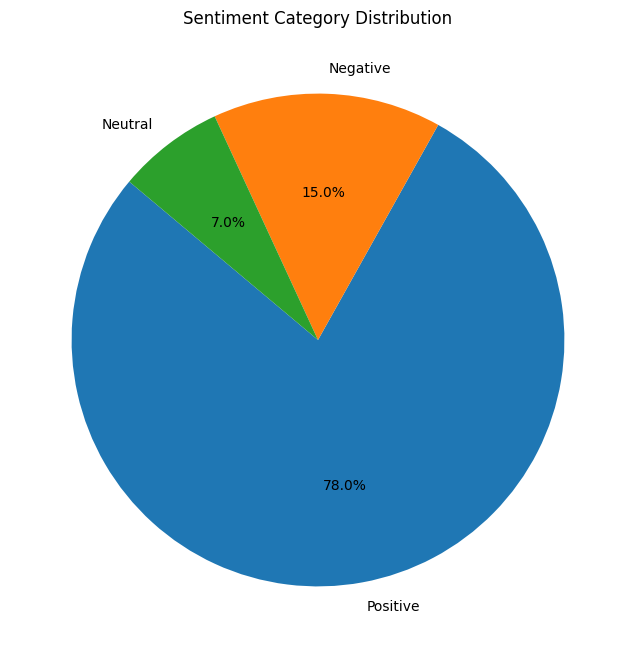

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your Excel file
df = pd.read_excel(r"C:\Users\win10\Downloads\reviews_with_sentiment (1).xlsx")

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.ylabel('')  # This hides the 'sentiment_category' label on the side

# Display the chart
plt.show()